In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import networkx as nx

In [4]:
sns.set()

In [5]:
path1 = '/home/mcalmeida/machine-learning/projects/case-neoway/conexoes_espec.csv'
path2 = '/home/mcalmeida/machine-learning/projects/case-neoway/individuos_espec.csv'

In [6]:
df_conexoes = pd.read_csv(path1,sep=';')
df_conexoes.head()

,V1,V2,grau,proximidade,prob_V1_V2
0,1,2,trabalho,visita_frequente,0.589462
1,1,3,trabalho,visita_rara,0.708465
2,2,4,trabalho,visita_casual,NaN
3,2,5,trabalho,visita_rara,0.638842
4,3,6,amigos,mora_junto,NaN


In [7]:
df_conexoes['V1_V2'] = df_conexoes[['V1','V2']].values.tolist()

In [8]:
df_conexoes['V1_V2_ordered'] = np.sort(df_conexoes['V1_V2'])

In [9]:
df_conexoes.head()

,V1,V2,grau,proximidade,prob_V1_V2,V1_V2,V1_V2_ordered
0,1,2,trabalho,visita_frequente,0.589462,"[1, 2]","[1, 2]"
1,1,3,trabalho,visita_rara,0.708465,"[1, 3]","[1, 3]"
2,2,4,trabalho,visita_casual,NaN,"[2, 4]","[2, 4]"
3,2,5,trabalho,visita_rara,0.638842,"[2, 5]","[2, 5]"
4,3,6,amigos,mora_junto,NaN,"[3, 6]","[3, 6]"


In [ ]:
np.sum(df_conexoes['V1_V2_ordered'].value_counts() >0)

In [54]:
primeiras = df_conexoes.head(30)

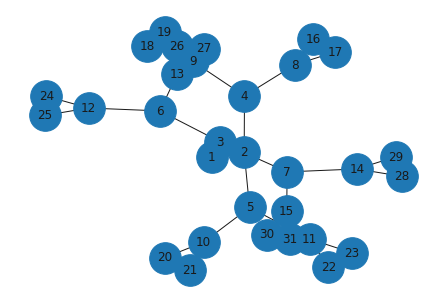

In [57]:
G = nx.from_pandas_edgelist(
    primeiras, 
    "V1", 
    "V2", 
    create_using=nx.Graph()
)

# plota o grafo
nx.draw(G, with_labels=True,  node_size = 1000, node_color)
plt.show()

In [24]:
df_conexoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   V1           999999 non-null  int64  
 1   V2           999999 non-null  int64  
 2   grau         999999 non-null  object 
 3   proximidade  999999 non-null  object 
 4   prob_V1_V2   499999 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 38.1+ MB


In [60]:
df_train = df_conexoes[~df_conexoes['prob_V1_V2'].isna()]
df_test = df_conexoes[df_conexoes['prob_V1_V2'].isna()]

In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 2 to 999998
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   V1           500000 non-null  int64  
 1   V2           500000 non-null  int64  
 2   grau         500000 non-null  object 
 3   proximidade  500000 non-null  object 
 4   prob_V1_V2   0 non-null       float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.9+ MB


In [ ]:
df_conexoes['grau']

In [7]:
df_individuos = pd.read_csv(path2,sep=';')
df_individuos.head()

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC
0,1,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956
1,2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720
2,3,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393
3,4,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053
4,5,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668


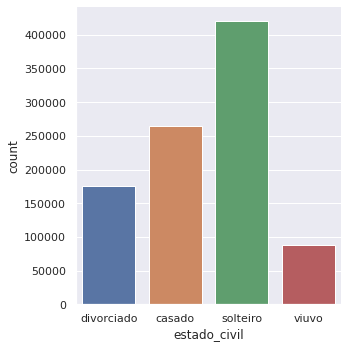

In [10]:
sns.catplot(
    data=df_individuos, 
    x='estado_civil', 
    kind='count'
)

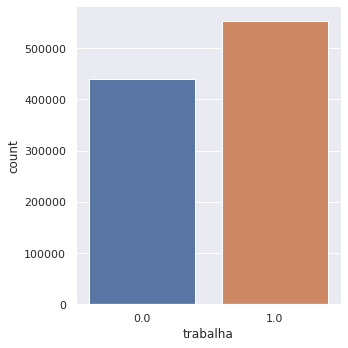

In [11]:
sns.catplot(
    data=df_individuos, 
    x='trabalha', 
    kind='count'
)

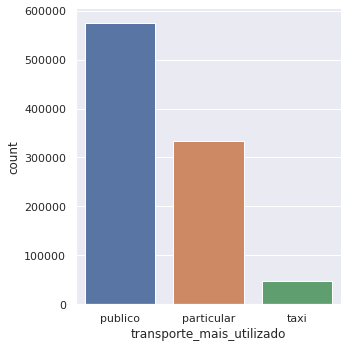

In [12]:
sns.catplot(
    data=df_individuos, 
    x='transporte_mais_utilizado', 
    kind='count'
)

In [21]:
df_individuos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   name                       1000000 non-null  int64  
 1   idade                      904063 non-null   float64
 2   estado_civil               949927 non-null   object 
 3   qt_filhos                  971133 non-null   float64
 4   estuda                     959870 non-null   float64
 5   trabalha                   993647 non-null   float64
 6   pratica_esportes           850876 non-null   float64
 7   transporte_mais_utilizado  956967 non-null   object 
 8   IMC                        886130 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 68.7+ MB


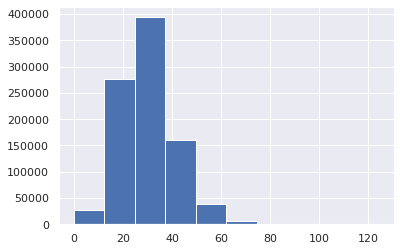

In [14]:
idade = df_individuos['idade']
_ = plt.hist(idade)
# _ = plt.xlabel(title_x)
# _ = plt.ylabel(title_y)
plt.show()

KeyboardInterrupt: 

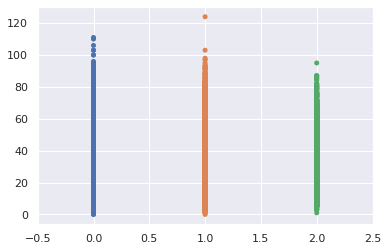

In [15]:
_ = sns.swarmplot(x='transporte_mais_utilizado', y='idade', data=df_individuos)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

# ECDF

In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n


    return x, y


In [7]:
# Prepare the data
x,y = ecdf(array)

In [ ]:
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('x_label')
_ = plt.ylabel('ECDF')
plt.margins(0.02) 
# Keeps data off plot edges
plt.show()

# Summary statistics: sample mean and median

## Mean

In [ ]:
np.mean(array)

## Median

In [ ]:
np.median(array)

## Percentile

In [ ]:
np.percentile(array, [array of percentiles])

Box plot are good to visualize these summaries

In [ ]:
_ = sns.boxplot(x='x_variable', y='y_variable',data=df)
_ = plt.xlabel('x_label')
_ = plt.ylabel('y_label')
plt.show()


## Variance

In [ ]:
np.var(array)

## Standard deviation

In [ ]:
np.std(array)

In [ ]:
np.std(array) = np.sqrt(np.var(array))

##  Scatter plot

In [ ]:
_ = plt.plot(
        quantity_1, 
        quantity_2,                 
        marker='.', 
        linestyle='none'
    )
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')

## Covariance matrix

ρ=Pearson correlation

=covariance/(std of x)(std of y)

= variability due to codependence/independant variability

The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.


In [ ]:
# Covariance matrix
np.cov(quantity_1,quantity_2)

In [ ]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.cov(x,y)/(np.std(x)*np.std(x=y))

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r


# Print the result

In [ ]:
# Correlation matrix
np.corrcoef(x,y)

In [ ]:
# Pearon r coefficient

np.corrcoef(x,y)